In [205]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm

import datetime

In [206]:
colors = cm.tab10

In [366]:
county = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
county.date = [datetime.datetime.strptime(c, '%Y-%m-%d') for c in county.date]

In [390]:
sorted(list(set(county.county)))

['Abbeville',
 'Acadia',
 'Accomack',
 'Ada',
 'Adair',
 'Adams',
 'Addison',
 'Aiken',
 'Alachua',
 'Alamance',
 'Alameda',
 'Albany',
 'Albemarle',
 'Alexandria city',
 'Allamakee',
 'Allegan',
 'Allegany',
 'Allegheny',
 'Allen',
 'Amador',
 'Amherst',
 'Amite',
 'Anchorage',
 'Anderson',
 'Androscoggin',
 'Anne Arundel',
 'Anoka',
 'Apache',
 'Arapahoe',
 'Arlington',
 'Armstrong',
 'Ascension',
 'Ashland',
 'Ashtabula',
 'Assumption',
 'Atascosa',
 'Atlantic',
 'Attala',
 'Austin',
 'Autauga',
 'Avoyelles',
 'Baker',
 'Baldwin',
 'Baltimore',
 'Baltimore city',
 'Bannock',
 'Barnstable',
 'Barrow',
 'Barry',
 'Bartholomew',
 'Bartow',
 'Bastrop',
 'Bates',
 'Bay',
 'Bayfield',
 'Beadle',
 'Beaufort',
 'Beauregard',
 'Beaver',
 'Bedford',
 'Belknap',
 'Bell',
 'Belmont',
 'Ben Hill',
 'Bennington',
 'Benton',
 'Bergen',
 'Berkeley',
 'Berks',
 'Berkshire',
 'Bernalillo',
 'Berrien',
 'Bertie',
 'Bexar',
 'Bibb',
 'Bienville',
 'Big Stone',
 'Bingham',
 'Black Hawk',
 'Blaine',
 'Bl

In [396]:
regions = ['New York City', 'San Francisco', 'Oakland', 'San Mateo']

## States

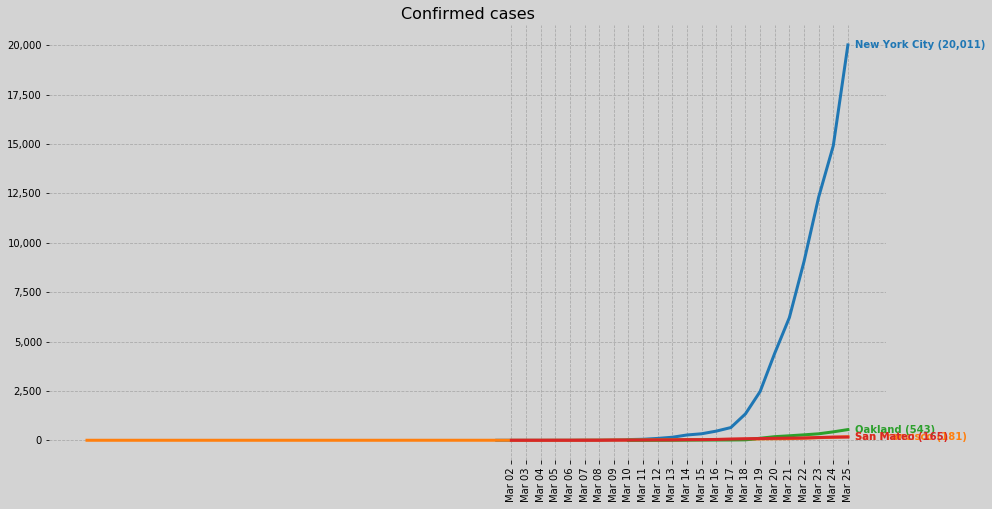

In [397]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)

minx = 0

for n,s in enumerate(regions):
    region = regions[n]
    
    dat = county.loc[county.county == region]
    
    y = dat.cases
    x = dat.date
    
    tmp = next((i for i, x in enumerate(y) if x), None)
    if tmp > minx:
        minx = tmp
    
    ax.plot(x, y, color = colors(n), linewidth = 3)
    ax.text(list(x)[-1]+datetime.timedelta(0.5), list(y)[-1], '{} ({:,.0f})'.format(region, list(y)[-1]), color = colors(n), va = 'center', ha = 'left', fontweight = 'bold')

for var in ['top', 'bottom', 'left', 'right']:
    ax.spines[var].set_visible(False)
    
ax.grid(linestyle = '--', color = 'darkgrey')

ax.set_xticks(x)
#ax.set_xlim((x[minx-5], x[-1]))
ax.set_title('Confirmed cases', fontsize = 16)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_ha('center')
    tick.set_va('top')
    
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

xfmt = mdates.DateFormatter('%b %d')
ax.get_figure().set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')
ax.xaxis.set_major_formatter(xfmt)

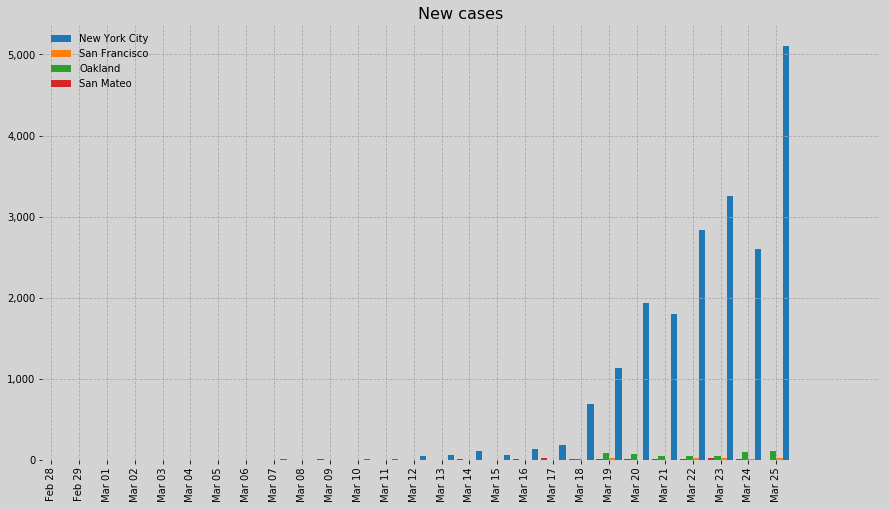

In [401]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)

minx = 0
width = 0.9/len(regions)

for n,dt in enumerate(sorted(list(set(county.date)))):
    for r,s in enumerate(regions):
        if dt < min(county.loc[county.county == region, 'date']):
            y = 0
        elif dt == min(county.loc[county.county == region, 'date']):
            idx = [(x == dt) and (y == s) for x,y in zip(county.date, county.county)]
            y = county.loc[idx, 'cases']
        else:
            prev_dt = max(county.loc[county.date < dt, 'date'])
            idx0 = [(x == prev_dt) and (y == s) for x,y in zip(county.date, county.county)]
            idx1 = [(x == dt) and (y == s) for x,y in zip(county.date, county.county)]
            if (sum(idx0) == 0) and (sum(idx1) == 0):
                y = 0
            elif (sum(idx0) == 0):
                y = county.loc[idx1, 'cases']
            else:
                y = county.loc[idx1, 'cases'].item() - county.loc[idx0, 'cases'].item()
        
        
        xpos = n + (len(regions)/2 * width) - (r*width) - (width/2)
        if n == 0:
            ax.bar(x = xpos, height = y, width = width, color = colors(r), label = s)
        else:
            ax.bar(x = xpos, height = y, width = width, color = colors(r), label = None)

for var in ['top', 'bottom', 'left', 'right']:
    ax.spines[var].set_visible(False)
    
ax.grid(linestyle = '--', color = 'darkgrey')
ax.legend(frameon = False)
ax.set_title('New cases', fontsize = 16)

x = sorted(list(set(county.date)))
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels([c.strftime('%b %d') for c in x]);

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_ha('center')
    tick.set_va('top')

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

xfmt = mdates.DateFormatter('%b %d')
ax.get_figure().set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')
ax.set_xlim(ax.get_xlim()[1]-30, ax.get_xlim()[1]);

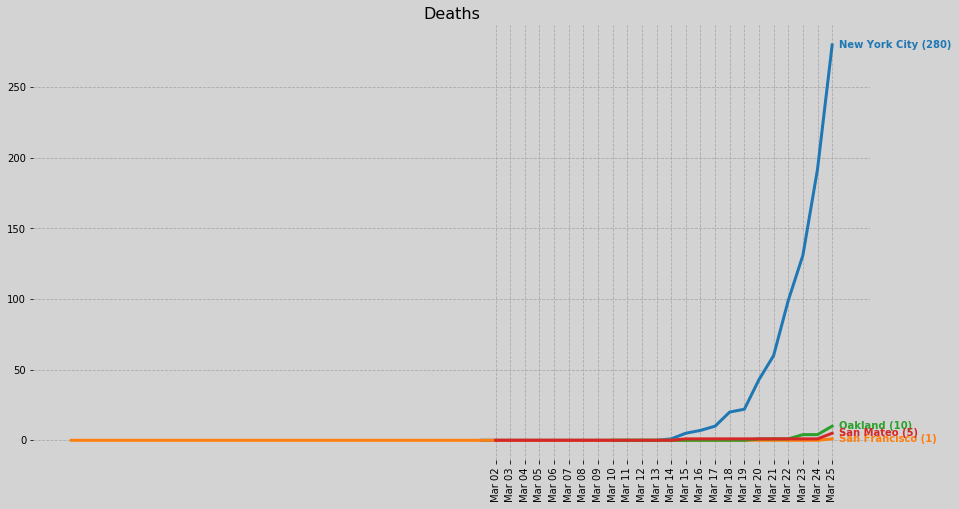

In [399]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)

minx = 0

for n,s in enumerate(regions):
    region = regions[n]
    
    dat = county.loc[county.county == region]
    
    y = dat.deaths
    x = dat.date
    
    tmp = next((i for i, x in enumerate(y) if x), None)
    if tmp > minx:
        minx = tmp
    
    ax.plot(x, y, color = colors(n), linewidth = 3)
    ax.text(list(x)[-1]+datetime.timedelta(0.5), list(y)[-1], '{} ({:,.0f})'.format(region, list(y)[-1]), color = colors(n), va = 'center', ha = 'left', fontweight = 'bold')

for var in ['top', 'bottom', 'left', 'right']:
    ax.spines[var].set_visible(False)
    
ax.grid(linestyle = '--', color = 'darkgrey')

ax.set_xticks(x)
#ax.set_xlim((x[minx-5], x[-1]))
ax.set_title('Deaths', fontsize = 16)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_ha('center')
    tick.set_va('top')
    
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

xfmt = mdates.DateFormatter('%b %d')
ax.get_figure().set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')
ax.xaxis.set_major_formatter(xfmt)

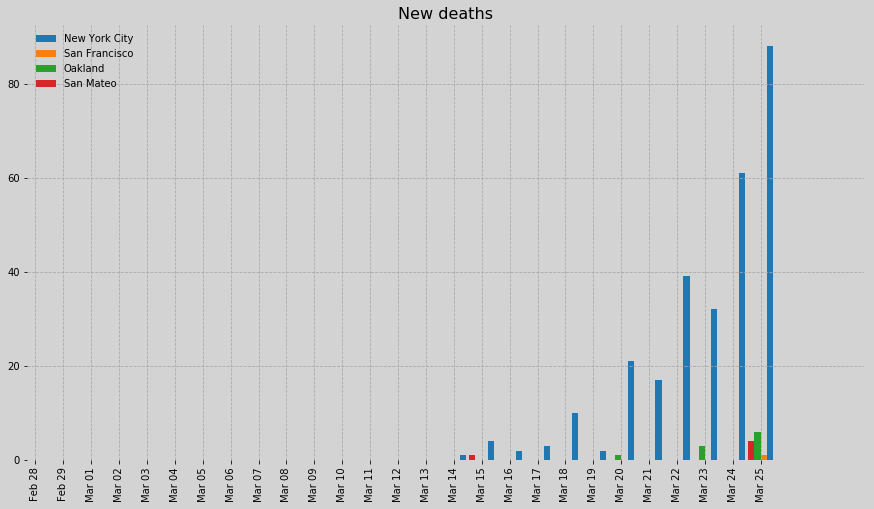

In [402]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)

minx = 0
width = 0.9/len(regions)

for n,dt in enumerate(sorted(list(set(county.date)))):
    for r,s in enumerate(regions):
        if dt < min(county.loc[county.county == region, 'date']):
            y = 0
        elif dt == min(county.loc[county.county == region, 'date']):
            idx = [(x == dt) and (y == s) for x,y in zip(county.date, county.county)]
            y = county.loc[idx, 'deaths']
        else:
            prev_dt = max(county.loc[county.date < dt, 'date'])
            idx0 = [(x == prev_dt) and (y == s) for x,y in zip(county.date, county.county)]
            idx1 = [(x == dt) and (y == s) for x,y in zip(county.date, county.county)]
            if (sum(idx0) == 0) and (sum(idx1) == 0):
                y = 0
            elif (sum(idx0) == 0):
                y = county.loc[idx1, 'deaths']
            else:
                y = county.loc[idx1, 'deaths'].item() - county.loc[idx0, 'deaths'].item()
        
        
        xpos = n + (len(regions)/2 * width) - (r*width) - (width/2)
        if n == 0:
            ax.bar(x = xpos, height = y, width = width, color = colors(r), label = s)
        else:
            ax.bar(x = xpos, height = y, width = width, color = colors(r), label = None)

for var in ['top', 'bottom', 'left', 'right']:
    ax.spines[var].set_visible(False)
    
ax.grid(linestyle = '--', color = 'darkgrey')
ax.legend(frameon = False)
ax.set_title('New deaths', fontsize = 16)

x = sorted(list(set(county.date)))
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels([c.strftime('%b %d') for c in x]);

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_ha('center')
    tick.set_va('top')

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

xfmt = mdates.DateFormatter('%b %d')
ax.get_figure().set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')
ax.set_xlim(ax.get_xlim()[1]-30, ax.get_xlim()[1]);